In [84]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random 
import pandas as pd
import numpy as np

from functools import reduce
from operator import add


In [85]:
import pandas as pd

In [108]:
! pip install pandas_profiling
from pandas_profiling import ProfileReport

ERROR: selenium 4.1.0 has requirement urllib3[secure]~=1.26, but you'll have urllib3 1.25.11 which is incompatible.
ERROR: huggingface-hub 0.4.0 has requirement packaging>=20.9, but you'll have packaging 20.4 which is incompatible.
ERROR: phik 0.12.2 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.


  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
Processing c:\users\antoi\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243\htmlmin-0.1.12-py3-none-any.whl
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached multimethod-1.7-py3-none-any.whl (9.5 kB)
Processing c:\users\antoi\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74\imagehash-4.2.1-py2.py3-none-any.whl
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7


# Données et statistiques descriptives

In [86]:
df = pd.read_csv('US-Afghan_war_tweets.csv', sep=',')


In [90]:
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (362566, 7)


,user_location,date,text,sentiment,polarity,hashtags,source
0,NaN,8/19/2021 23:59,cant recall told troops afghanistan falsely ...,negative,-0.300,['afghanistan'],twitter for iphone
1,"washington, dc",8/19/2021 23:59,shocker afghanistan taliban carrying doorto do...,neutral,0.000,['afghanistan'],twitter for ipad
2,NaN,8/19/2021 23:59,drop bass bombs big homie afghanistan talibans,negative,-0.075,"['afghanistan', 'talibans']",twitter for iphone
3,"midnapore, west bengal, uk outreach",8/19/2021 23:59,burqa prices risen markets afghanistans provin...,negative,-0.250,['afghanistan'],twitter web app
4,"york, england",8/19/2021 23:59,uk carved afghanistan s heroin minorities mili...,neutral,0.000,['afghanistan'],twitter for ipad


In [12]:
print(len(df.text.unique()))

359904


In [91]:
df.isnull().sum()
#On va supprimer les na de notre base de données

user_location    100994
date                  1
text                  1
sentiment             0
polarity              0
hashtags          86361
source                4
dtype: int64

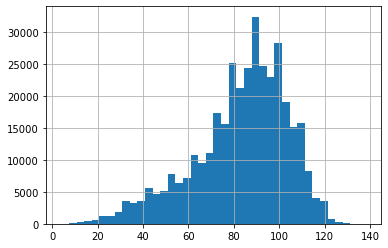

In [102]:
%matplotlib inline
df['text'].dropna().apply(len).hist(bins=40)

sentiment
negative    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
neutral     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
positive    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

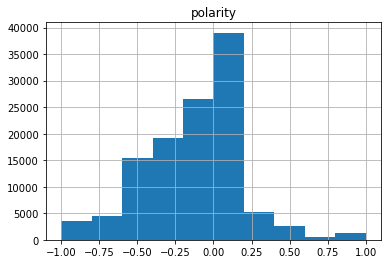

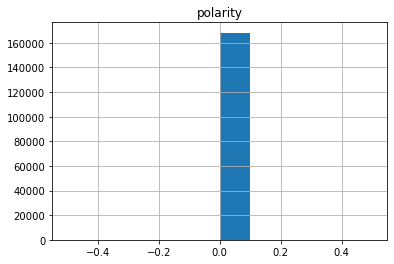

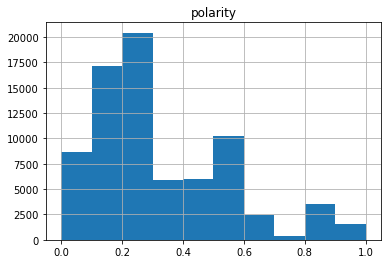

In [105]:
df.groupby(df.sentiment).hist()

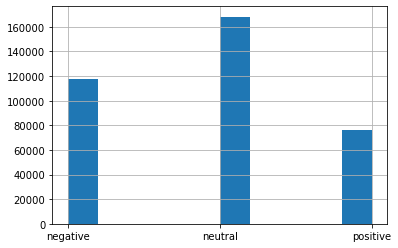

In [111]:
df.sentiment.hist()

In [113]:
df.date.hist()
#il faut que l'on regroupe les dates par jours, il y a trop d'heures différentes

Error in callback <function flush_figures at 0x000002429DB57280> (for post_execute):


KeyboardInterrupt: 

In [109]:
profile = ProfileReport(df, title="Sentiment analysis", html={"style": {"full_width": True}})

In [110]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocessing